In [43]:
import networkx as nx

In [44]:
import pandas as pd
file_path = '/kaggle/input/llm-task/train_v2_drcat_02.csv'
data = pd.read_csv(file_path)
data.head()

,text,label,prompt_name,source,RDizzl3_seven
0,Phones\n\nModern humans today are always on th...,0,Phones and driving,persuade_corpus,False
1,This essay will explain if drivers should or s...,0,Phones and driving,persuade_corpus,False
2,Driving while the use of cellular devices\n\nT...,0,Phones and driving,persuade_corpus,False
3,Phones & Driving\n\nDrivers should not be able...,0,Phones and driving,persuade_corpus,False
4,Cell Phone Operation While Driving\n\nThe abil...,0,Phones and driving,persuade_corpus,False


In [45]:
summary = {
    'Dataset Info': data.info(),
    'Statistical Summary': data.describe(),
    'Unique Values in prompt_name': data['prompt_name'].unique(),
    'Unique Values in source': data['source'].unique()
}

missing_values = data.isnull().sum()
summary, missing_values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44868 entries, 0 to 44867
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   text           44868 non-null  object
 1   label          44868 non-null  int64 
 2   prompt_name    44868 non-null  object
 3   source         44868 non-null  object
 4   RDizzl3_seven  44868 non-null  bool  
dtypes: bool(1), int64(1), object(3)
memory usage: 1.4+ MB


({'Dataset Info': None,
  'Statistical Summary':               label
  count  44868.000000
  mean       0.389966
  std        0.487748
  min        0.000000
  25%        0.000000
  50%        0.000000
  75%        1.000000
  max        1.000000,
  'Unique Values in prompt_name': array(['Phones and driving', 'Car-free cities', 'Summer projects',
         '"A Cowboy Who Rode the Waves"',
         'Mandatory extracurricular activities', 'Exploring Venus',
         'Facial action coding system', 'The Face on Mars',
         'Community service', 'Grades for extracurricular activities',
         'Driverless cars', 'Does the electoral college work?',
         'Cell phones at school', 'Distance learning',
         'Seeking multiple opinions'], dtype=object),
  'Unique Values in source': array(['persuade_corpus', 'mistral7binstruct_v2', 'llama_70b_v1',
         'chat_gpt_moth', 'darragh_claude_v7', 'darragh_claude_v6',
         'mistral7binstruct_v1', 'llama2_chat', 'falcon_180b_v1',
         '

In [46]:
!pip install seaborn


[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: pip install --upgrade pip


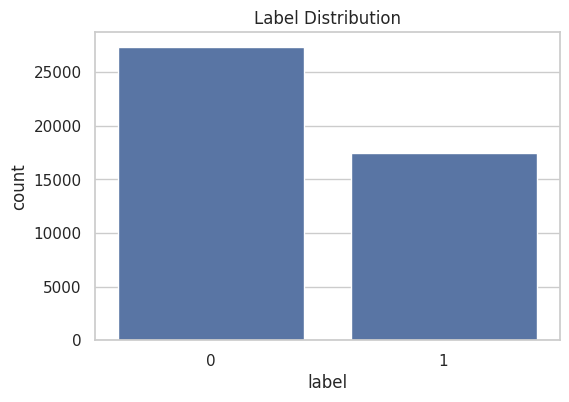

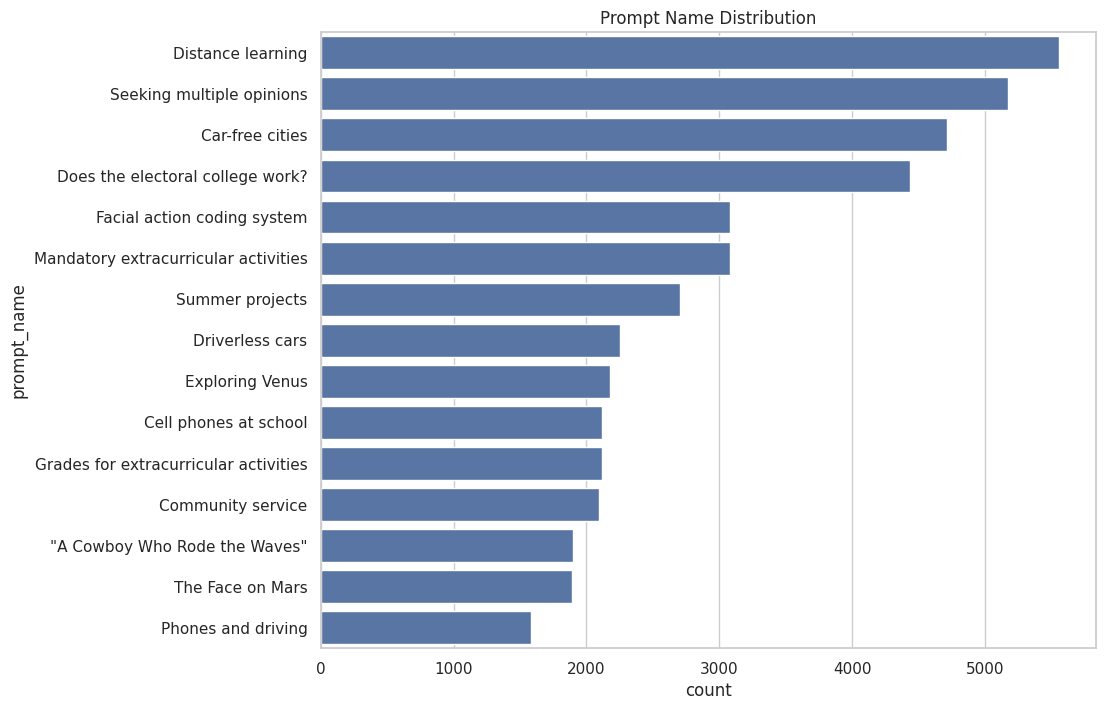

/tmp/ipykernel_13/2097026344.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=source_counts.index, x=source_counts.values, palette="viridis")


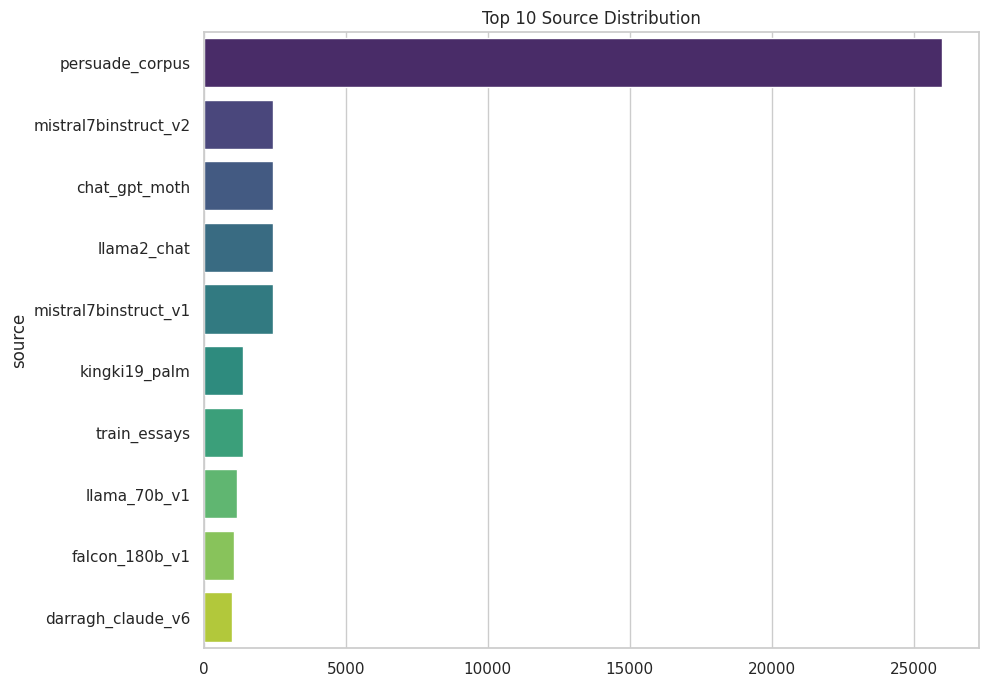

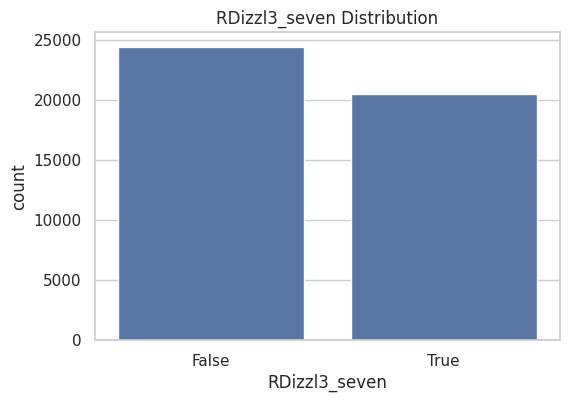

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")


plt.figure(figsize=(6, 4))
sns.countplot(x='label', data=data)
plt.title('Label Distribution')
plt.show()


plt.figure(figsize=(10, 8))
sns.countplot(y='prompt_name', data=data, order = data['prompt_name'].value_counts().index)
plt.title('Prompt Name Distribution')
plt.show()

plt.figure(figsize=(10, 8))
source_counts = data['source'].value_counts().head(10)  # Limiting to top 10 sources for clarity
sns.barplot(y=source_counts.index, x=source_counts.values, palette="viridis")
plt.title('Top 10 Source Distribution')
plt.show()

plt.figure(figsize=(6, 4))
sns.countplot(x='RDizzl3_seven', data=data)
plt.title('RDizzl3_seven Distribution')
plt.show()

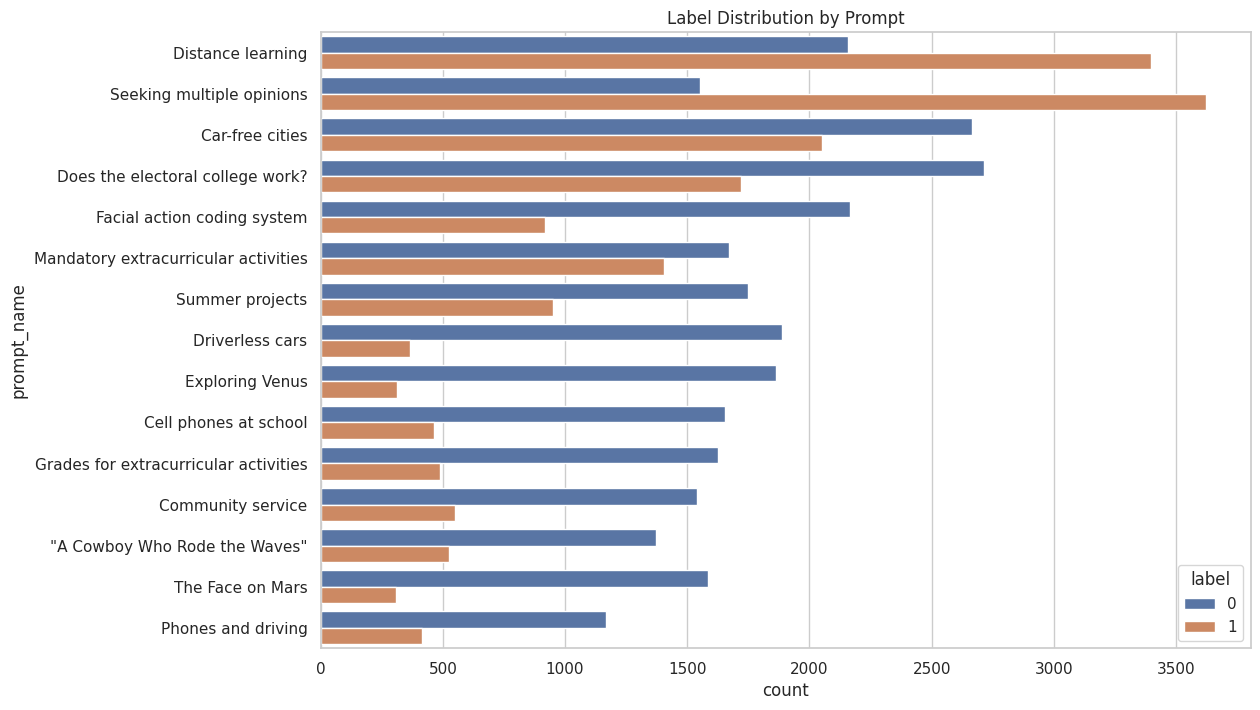

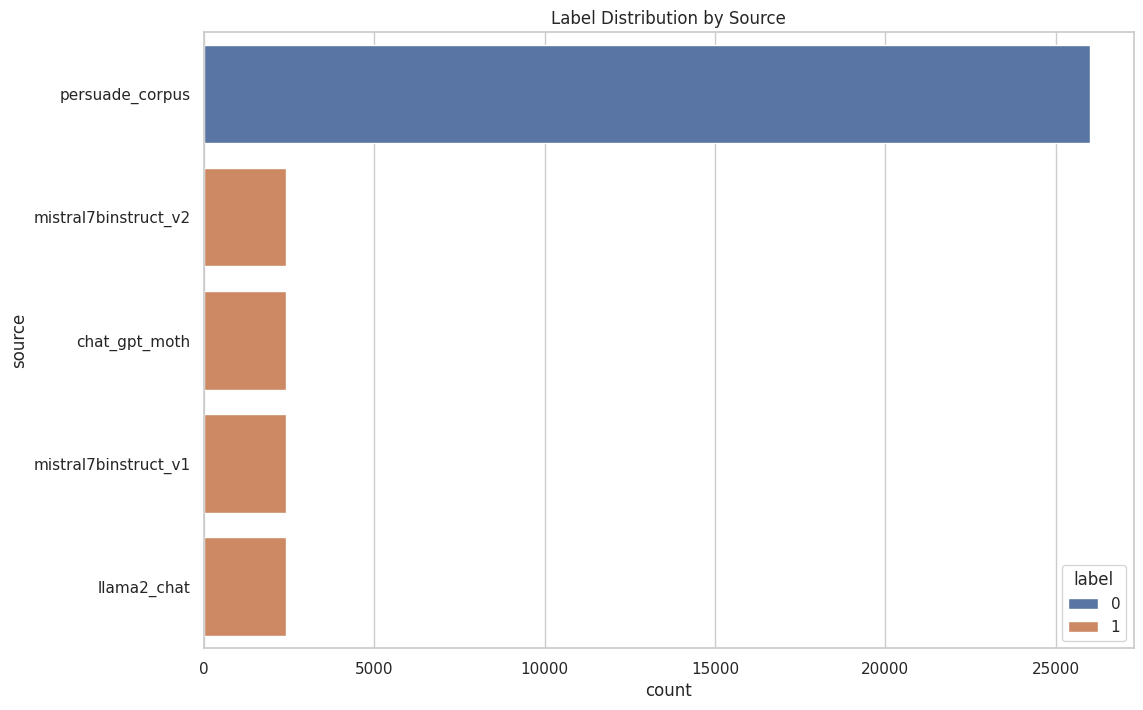

In [48]:
plt.figure(figsize=(12, 8))
sns.countplot(y='prompt_name', hue='label', data=data, order=data['prompt_name'].value_counts().index)
plt.title('Label Distribution by Prompt')
plt.show()

top_sources = data['source'].value_counts().head(5).index
filtered_data = data[data['source'].isin(top_sources)]
plt.figure(figsize=(12, 8))
sns.countplot(y='source', hue='label', data=filtered_data)
plt.title('Label Distribution by Source')
plt.show()

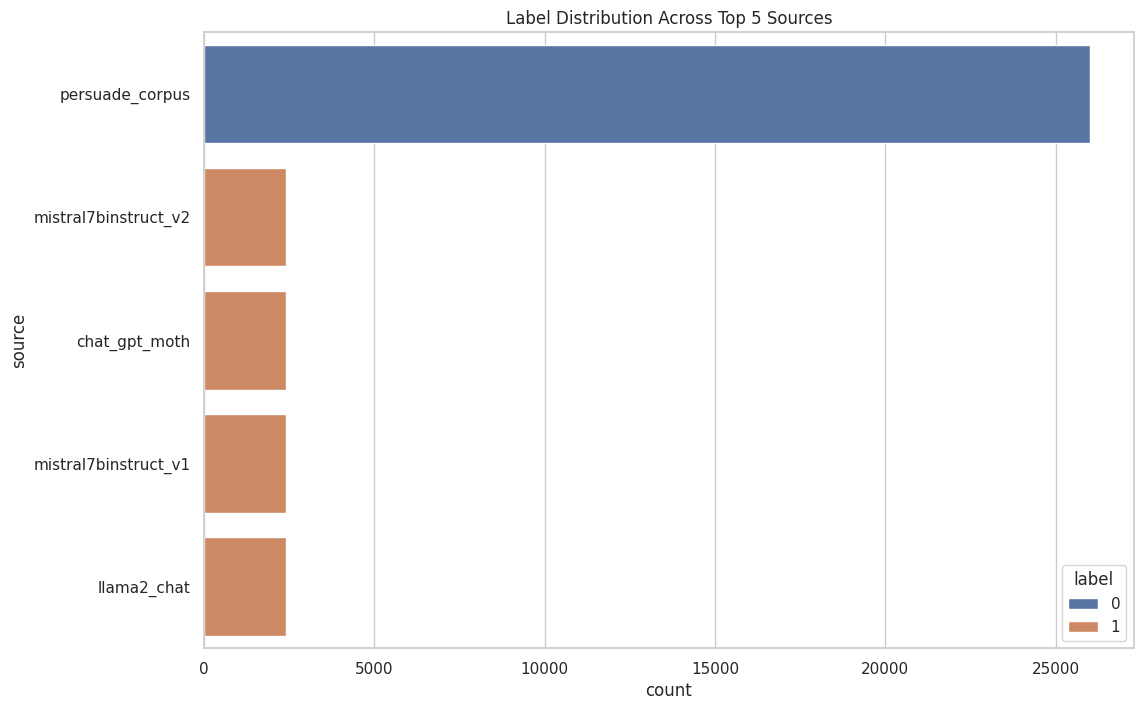

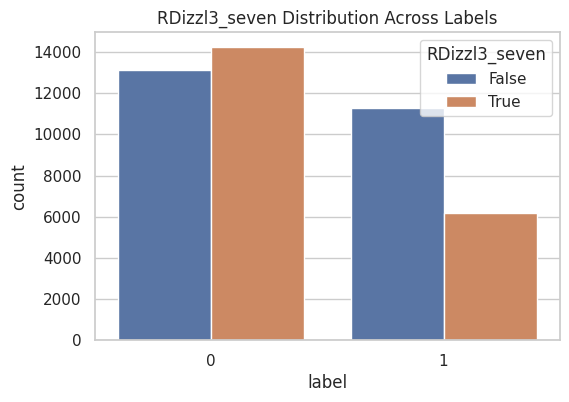

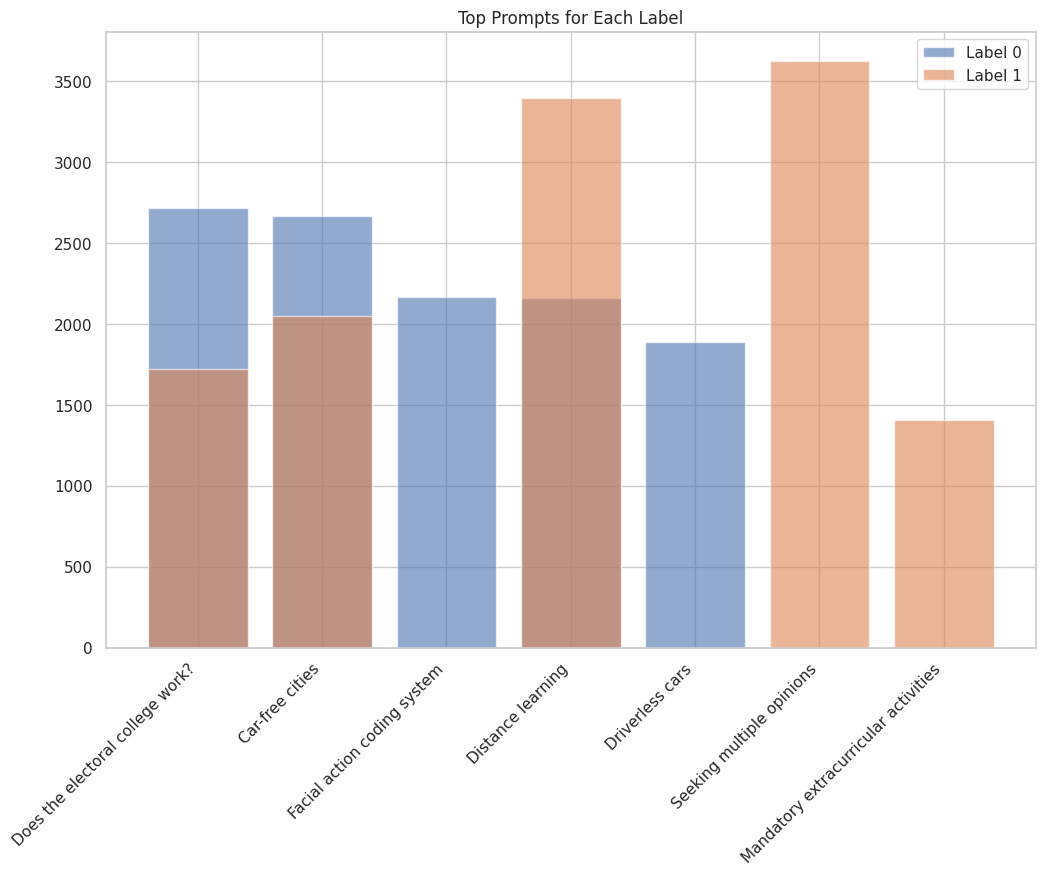

In [49]:
plt.figure(figsize=(12, 8))
sns.countplot(y='source', hue='label', data=filtered_data, order=filtered_data['source'].value_counts().head(5).index)
plt.title('Label Distribution Across Top 5 Sources')
plt.show()

plt.figure(figsize=(6, 4))
sns.countplot(x='label', hue='RDizzl3_seven', data=data)
plt.title('RDizzl3_seven Distribution Across Labels')
plt.show()

top_prompts_label_0 = data[data['label'] == 0]['prompt_name'].value_counts().head(5)
top_prompts_label_1 = data[data['label'] == 1]['prompt_name'].value_counts().head(5)

plt.figure(figsize=(12, 8))
plt.bar(top_prompts_label_0.index, top_prompts_label_0.values, alpha=0.6, label='Label 0')
plt.bar(top_prompts_label_1.index, top_prompts_label_1.values, alpha=0.6, label='Label 1')
plt.title('Top Prompts for Each Label')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.show()

top_prompts = data['prompt_name'].value_counts().head(5).index
filtered_data_for_boxplot = data[data['prompt_name'].isin(top_prompts)]


<Figure size 1200x800 with 0 Axes>

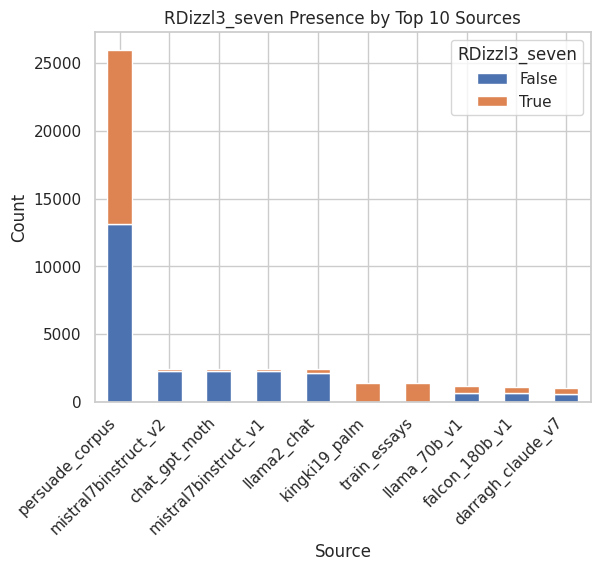

In [50]:

source_rdizzl3_interaction = pd.crosstab(data['source'], data['RDizzl3_seven'])
source_rdizzl3_interaction['Total'] = source_rdizzl3_interaction.sum(axis=1)
source_rdizzl3_interaction = source_rdizzl3_interaction.sort_values(by='Total', ascending=False).drop('Total', axis=1).head(10)

plt.figure(figsize=(12, 8))
source_rdizzl3_interaction.plot(kind='bar', stacked=True)
plt.title('RDizzl3_seven Presence by Top 10 Sources')
plt.ylabel('Count')
plt.xlabel('Source')
plt.xticks(rotation=45, ha='right')
plt.show()

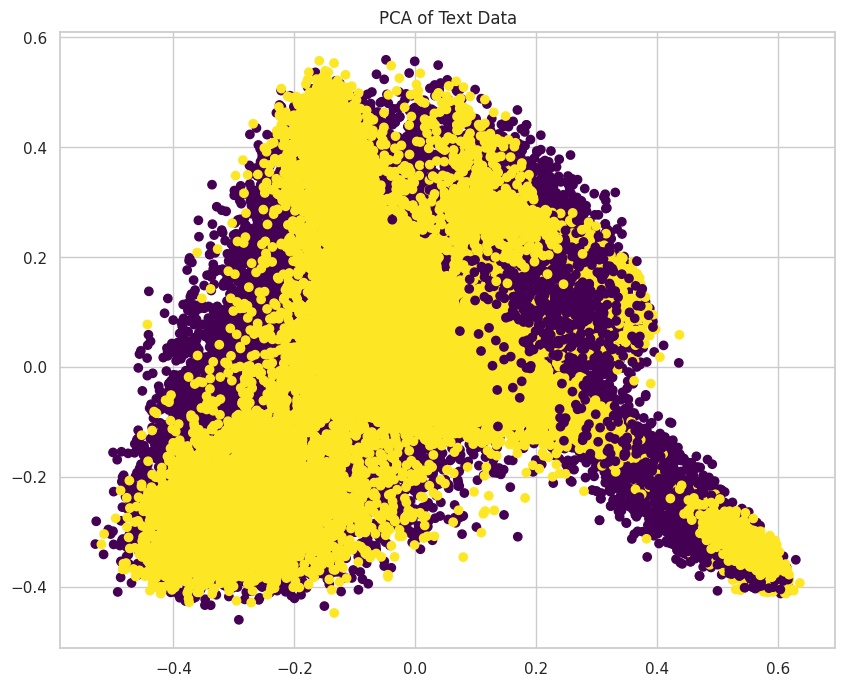

In [51]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

vectorizer = TfidfVectorizer(max_features=100)
X = vectorizer.fit_transform(data['text']).toarray()
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(10, 8))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=data['label'], cmap='viridis')
plt.title('PCA of Text Data')
plt.show()

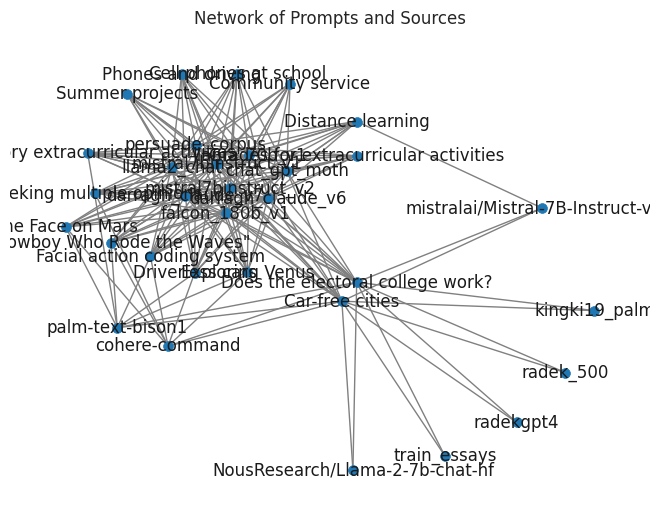

In [52]:
import networkx as nx

B = nx.Graph()
B.add_nodes_from(data['prompt_name'].unique(), bipartite=0)
B.add_nodes_from(data['source'].unique(), bipartite=1)

for index, row in data.iterrows():
    B.add_edge(row['prompt_name'], row['source'], weight=1)

pos = nx.spring_layout(B)
nx.draw(B, pos, with_labels=True, node_size=50, edge_color='gray', linewidths=0.5)
plt.title('Network of Prompts and Sources')
plt.show()

In [53]:
!pip install TextBlob


[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: pip install --upgrade pip


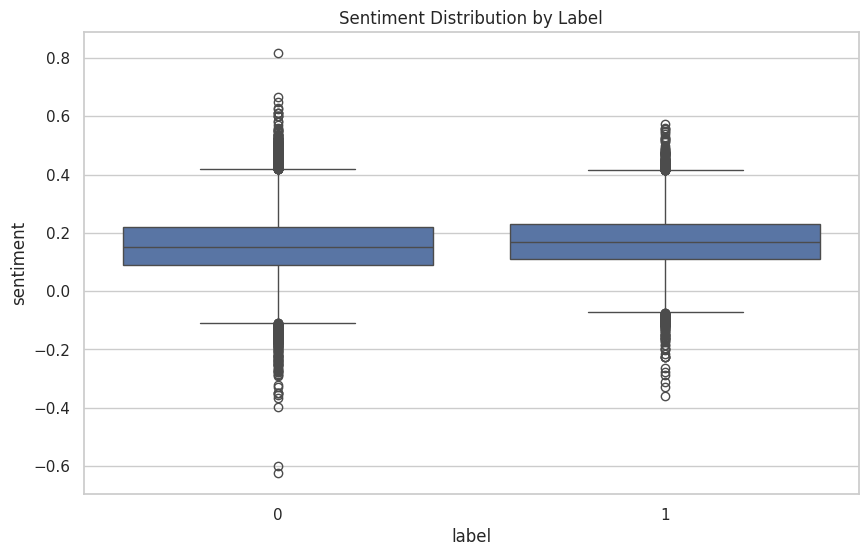

In [54]:
from textblob import TextBlob
data['sentiment'] = data['text'].apply(lambda x: TextBlob(x).sentiment.polarity)

plt.figure(figsize=(10, 6))
sns.boxplot(x='label', y='sentiment', data=data)
plt.title('Sentiment Distribution by Label')
plt.show()

In [55]:
# from scipy.cluster.hierarchy import dendrogram, linkage

# Z = linkage(X, 'ward')

# plt.figure(figsize=(10, 8))
# dendrogram(Z)
# plt.title('Hierarchical Clustering Dendrogram')
# plt.xlabel('Texts')
# plt.ylabel('Distance')
# plt.show()


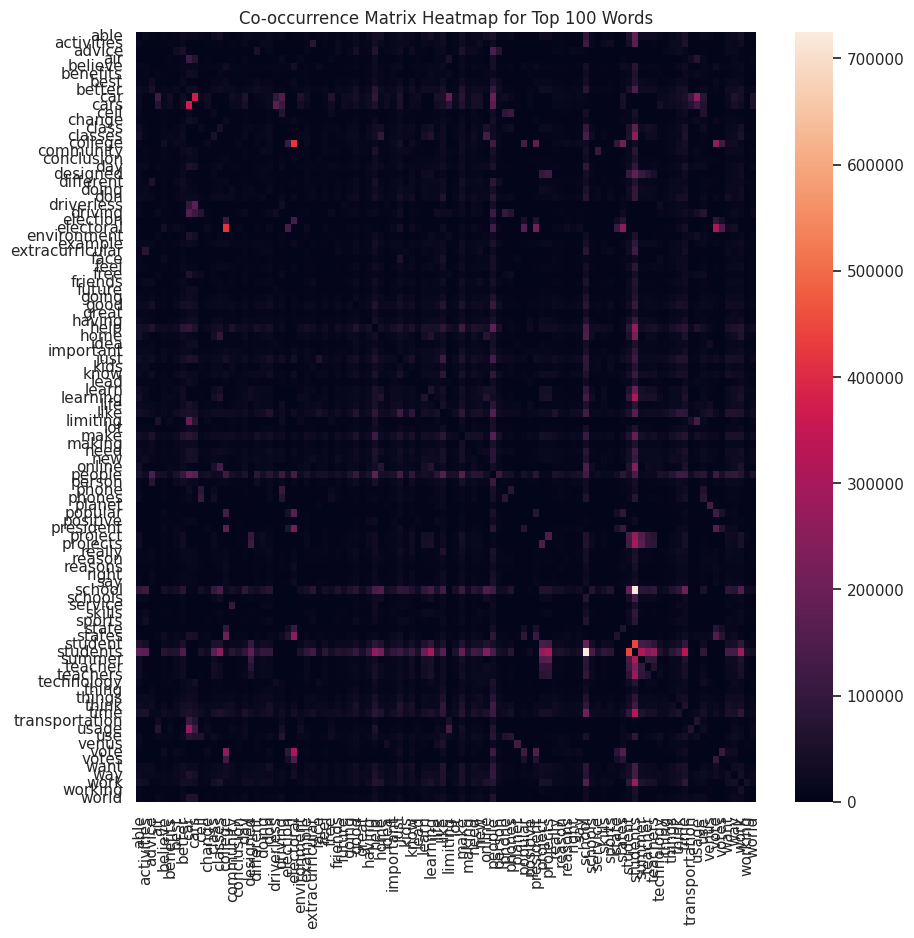

In [56]:
from sklearn.feature_extraction.text import CountVectorizer
import seaborn as sns
import matplotlib.pyplot as plt

vectorizer = CountVectorizer(stop_words='english', max_features=100)
X = vectorizer.fit_transform(data['text'])
Xc = (X.T * X)
Xc.setdiag(0)  # We set the diagonal to 0 as we're not interested in self-co-occurrence

fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(Xc.toarray(), annot=False, xticklabels=vectorizer.get_feature_names_out(), yticklabels=vectorizer.get_feature_names_out(), ax=ax)
plt.title("Co-occurrence Matrix Heatmap for Top 100 Words")
plt.show()


In [57]:
# from sklearn.decomposition import LatentDirichletAllocation
# from sklearn.feature_extraction.text import CountVectorizer

# count_vect = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
# dtm = count_vect.fit_transform(data['text'])

# lda = LatentDirichletAllocation(n_components=5, random_state=0)  # Adjust the number of topics
# lda.fit(dtm)


# def display_topics(model, feature_names, no_top_words):
#     for topic_idx, topic in enumerate(model.components_):
#         print(f"Topic {topic_idx}:")
#         print(" ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))

# display_topics(lda, count_vect.get_feature_names(), 10)


In [58]:
# import spacy
# nlp = spacy.load('en_core_web_sm')
# doc = nlp("This is an example sentence for dependency parsing.")
# spacy.displacy.render(doc, style='dep', jupyter=True, options={'distance': 90})


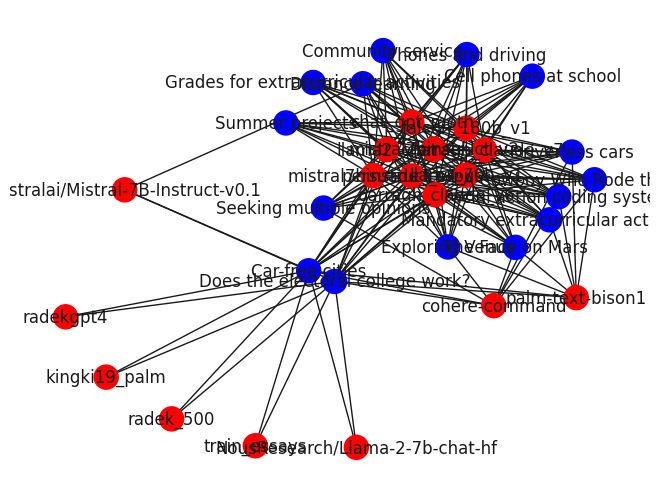

In [59]:
import matplotlib.pyplot as plt
import networkx as nx

G = nx.Graph()
for prompt in data['prompt_name'].unique():
    G.add_node(prompt, type='prompt')

for source in data['source'].unique():
    G.add_node(source, type='source')

for _, row in data.iterrows():
    G.add_edge(row['prompt_name'], row['source'])

node_colors = ['blue' if G.nodes[node]['type'] == 'prompt' else 'red' for node in G]

pos = nx.spring_layout(G)  # Positions for all nodes
nx.draw(G, pos, node_color=node_colors, with_labels=True)
plt.show()


In [60]:
!pip install gensim


[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: pip install --upgrade pip


In [61]:
!pip install textstat


[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: pip install --upgrade pip


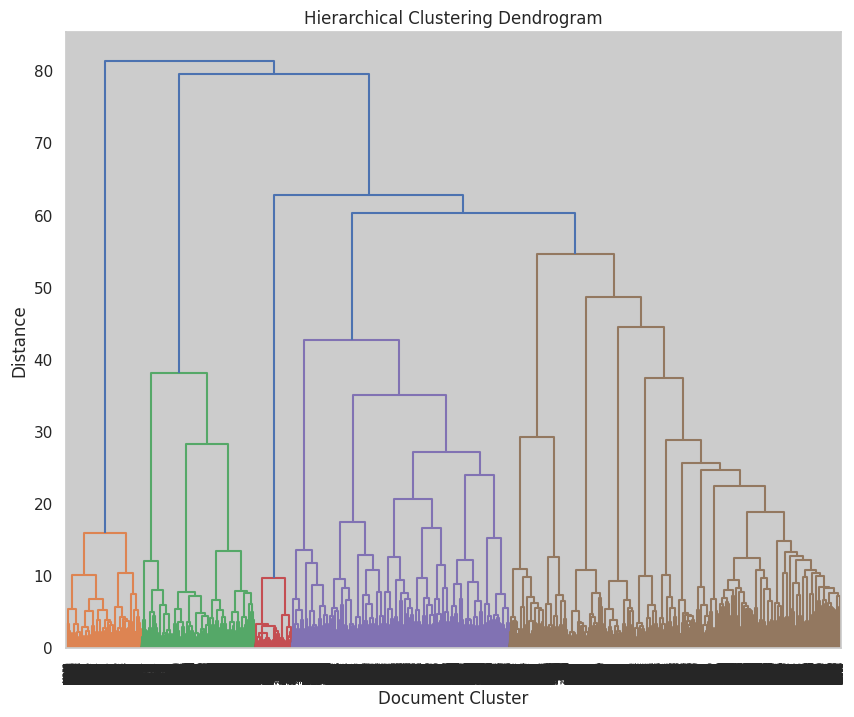

In [62]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

texts = data['text'].tolist()

vectorizer = TfidfVectorizer(max_features=100, stop_words='english')
X = vectorizer.fit_transform(texts).toarray()

Z = linkage(X, method='ward')

plt.figure(figsize=(10, 8))
dendrogram(Z)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Document Cluster')
plt.ylabel('Distance')
plt.show()


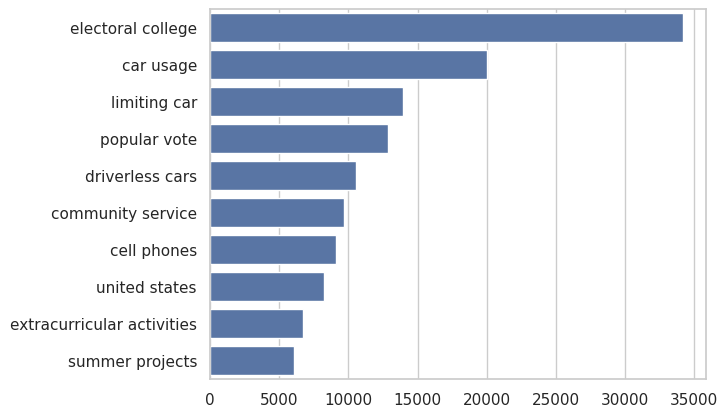

In [63]:
from sklearn.feature_extraction.text import CountVectorizer
import seaborn as sns

def plot_top_ngrams_barchart(text, n=2):
    vec = CountVectorizer(ngram_range=(n, n), stop_words='english').fit(text)
    bag_of_words = vec.transform(text)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    top_words_freq = words_freq[:10]
    top_ngrams = zip(*top_words_freq)
    tokens, counts = [list(t) for t in top_ngrams]
    sns.barplot(x=counts, y=tokens)


plot_top_ngrams_barchart(data['text'], n=2)


In [64]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

texts = data['text'].tolist()

vectorizer = TfidfVectorizer(max_features=100, stop_words='english')
X_tfidf = vectorizer.fit_transform(texts)
similarity_matrix = cosine_similarity(X_tfidf)

In [65]:
from gensim.models import Word2Vec
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np

model_w2v = Word2Vec(sentences, vector_size=100, window=5, min_count=1, workers=4)
word_vectors = np.array([model_w2v.wv[word] for word in model_w2v.wv.index_to_key])
kmeans_clustering = KMeans(n_clusters=10)
idx = kmeans_clustering.fit_predict(word_vectors)

word_centroid_map = {word: cluster for word, cluster in zip(model_w2v.wv.index_to_key, idx)}


for cluster in range(10):  # Number of clusters
    print(f"Cluster {cluster}:")
    words = [word for word, c in word_centroid_map.items() if c == cluster]
    print(words[:10])  # Print top 10 words per cluster


Cluster 0:
["I'm", 'though', 'hope', 'all,', "we're", 'alone', "let's", 'everyday', 'thats', 'fully']
Cluster 1:
['be', 'have', 'do', 'help', 'get', 'make', 'think', 'work', 'take', 'use']
Cluster 2:
['to', 'is', 'students', 'people', 'because', 'but', 'by', 'it.', 'school.', 'them.']
Cluster 3:
['The', 'In', 'This', 'It', 'If', 'For', 'When', 'They', 'There', 'conclusion,']
Cluster 4:
['learning', 'things', 'classes', 'projects', 'activities', 'kids', 'working', 'benefits', 'sports', 'friends']
Cluster 5:
['it', 'time', 'student', 'way', 'Electoral', 'vote', 'College', 'something', 'Venus', 'phones']
Cluster 6:
['car', 'cars', 'which', 'driving', 'such', 'usage', 'less', 'lot', 'limiting', 'positive']
Cluster 7:
['studying', 'provides', 'main', 'several', 'Cowboys', 'seeking', 'becoming', 'common', 'key', 'strong']
Cluster 8:
['the', 'and', 'a', 'of', 'that', 'in', 'for', 'can', 'you', 'are']
Cluster 9:
['was', 'been', 'had', 'were', 'he', 'example,', 'day', 'his', 'first', 'high']


In [66]:
from scipy.stats import ttest_ind
data['text_length'] = data['text'].apply(lambda x: len(x.split()))
t_stat, p_value = ttest_ind(data[data['label'] == 0]['text_length'], data[data['label'] == 1]['text_length'])

print(f"T-test statistic: {t_stat}, p-value: {p_value}")

T-test statistic: 57.70808727667219, p-value: 0.0


In [67]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
tfidf_vectorizer = TfidfVectorizer(max_features=1000, stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(data['text'])
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(tfidf_matrix)
data['cluster'] = kmeans.labels_


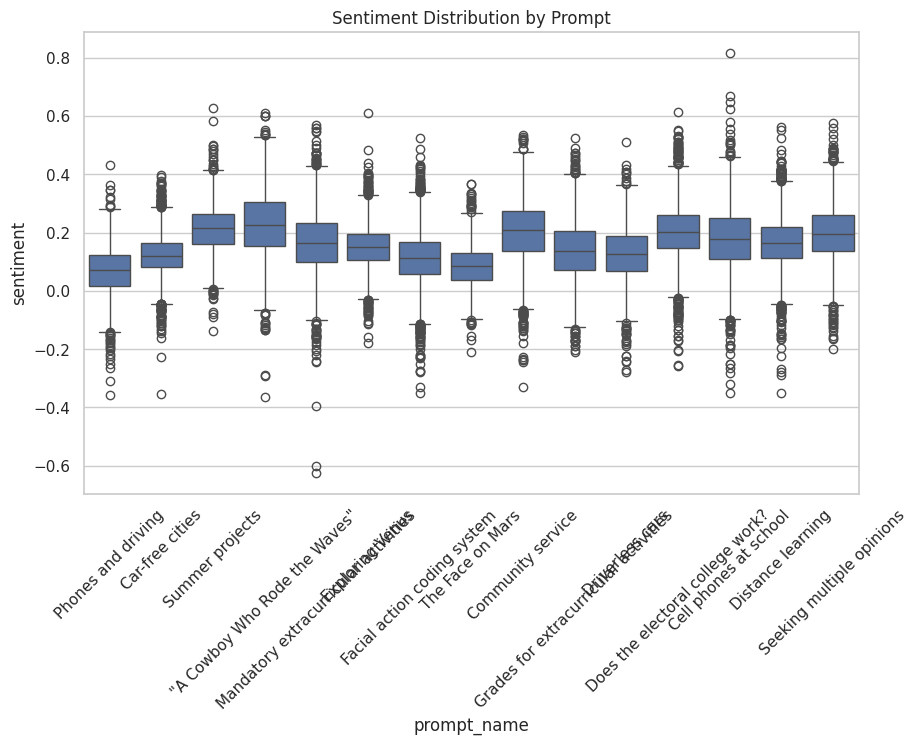

In [68]:
from textblob import TextBlob

def calculate_polarity(text):
    return TextBlob(text).sentiment.polarity

data['sentiment'] = data['text'].apply(calculate_polarity)
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.boxplot(x='prompt_name', y='sentiment', data=data)
plt.xticks(rotation=45)
plt.title('Sentiment Distribution by Prompt')
plt.show()
